<a href="https://colab.research.google.com/github/Giriteja-08/Skin-Cancer-Detection-Using-CNN/blob/main/Skin_Cancer_Detection__Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                   **Skin Cancer Detection Using CNN**
#                       

####Name: C Giri Teja


####Installation of Kaggle(Dataset source).

In [ ]:
 !pip install -q kaggle

####connecting colab to it using "json" file we downloaded by generating a API token.

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

####Downloading the required dataset(Zip Format).

In [ ]:
! kaggle datasets download -d kmader/skin-cancer-mnist-ham10000

100% 5.19G/5.20G [01:00<00:00, 129MB/s]
100% 5.20G/5.20G [01:00<00:00, 91.8MB/s]


####Unzipping the downloaded dataset and saving with new name.

In [ ]:
import zipfile
a = zipfile.ZipFile('/content/skin-cancer-mnist-ham10000.zip','r')
a.extractall('/content/HAM10000')
a.close()

####Importing the required libraries

In [ ]:
import numpy as np
import pandas as pd
import os
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam, RMSprop
from sklearn.model_selection import train_test_split

####Importing the dataset

In [ ]:
meta=pd.read_csv("/content/HAM10000/HAM10000_metadata.csv")

In [ ]:
np.random.seed(101)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(meta['dx'])
LabelEncoder()
print(list(le.classes_))

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']


####We will label dx column in  metadata which we will be used for classification

In [ ]:
meta['label']=le.transform(meta["dx"])

In [ ]:
print(meta)

         lesion_id      image_id     dx dx_type   age     sex localization  \
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp   
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp   
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp   
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp   
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear   
...            ...           ...    ...     ...   ...     ...          ...   
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen   
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen   
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen   
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face   
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back   

       label  
0          2  
1          2  
2          2  
3  

In [ ]:
print(meta['dx'].value_counts())

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64


####Now we will be linking the image with meta data

In [ ]:
image_path={os.path.splitext(os.path.basename(x))[0]:x
            for x in glob(os.path.join('/content/HAM10000/', '*' ,'*.jpg'))}

In [ ]:
print(image_path)

{'ISIC_0032560': '/content/HAM10000/HAM10000_images_part_2/ISIC_0032560.jpg', 'ISIC_0031947': '/content/HAM10000/HAM10000_images_part_2/ISIC_0031947.jpg', 'ISIC_0032262': '/content/HAM10000/HAM10000_images_part_2/ISIC_0032262.jpg', 'ISIC_0030675': '/content/HAM10000/HAM10000_images_part_2/ISIC_0030675.jpg', 'ISIC_0030139': '/content/HAM10000/HAM10000_images_part_2/ISIC_0030139.jpg', 'ISIC_0033488': '/content/HAM10000/HAM10000_images_part_2/ISIC_0033488.jpg', 'ISIC_0033369': '/content/HAM10000/HAM10000_images_part_2/ISIC_0033369.jpg', 'ISIC_0033389': '/content/HAM10000/HAM10000_images_part_2/ISIC_0033389.jpg', 'ISIC_0031235': '/content/HAM10000/HAM10000_images_part_2/ISIC_0031235.jpg', 'ISIC_0033533': '/content/HAM10000/HAM10000_images_part_2/ISIC_0033533.jpg', 'ISIC_0030734': '/content/HAM10000/HAM10000_images_part_2/ISIC_0030734.jpg', 'ISIC_0032292': '/content/HAM10000/HAM10000_images_part_2/ISIC_0032292.jpg', 'ISIC_0029308': '/content/HAM10000/HAM10000_images_part_2/ISIC_0029308.jpg'

In [ ]:
meta['path']=meta['image_id'].map(image_path.get)

In [ ]:
print(meta)

         lesion_id      image_id     dx dx_type   age     sex localization  \
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp   
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp   
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp   
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp   
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear   
...            ...           ...    ...     ...   ...     ...          ...   
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen   
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen   
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen   
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face   
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back   

       label                                               path

####We will now resize our image and convert it into numpy arrays so that we can feed the data to our model

In [ ]:
from PIL import Image
meta['image']=meta['path'].map(lambda x:np.asarray(Image.open(x).resize((75,75))))

In [ ]:
print(meta)

         lesion_id      image_id     dx dx_type   age     sex localization  \
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp   
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp   
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp   
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp   
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear   
...            ...           ...    ...     ...   ...     ...          ...   
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen   
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen   
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen   
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face   
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back   

       label                                               path

####Here we are taking the image data as our x variable and labeled data in csv as our y variable

In [ ]:
import tensorflow as tf
x=np.asarray(meta['image'].tolist())
x=x/225
y=meta['label']
y_cat=tf.keras.utils.to_categorical(y,num_classes=7)

####splitting data into testing and training

In [ ]:
random_seed=42
x_train,x_test,y_train,y_test=train_test_split(x,y_cat,test_size=0.3,random_state=42)

##Basic CNN

In [ ]:
def build_cnn_model(input_shape = (75,75, 3), num_classes=7):
    model = Sequential()

    model.add(Conv2D(64, kernel_size=(3,3), padding='Same', input_shape = input_shape, activation='relu', kernel_initializer = 'glorot_uniform'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Dropout(0.25))


    model.add(Conv2D(64, kernel_size=(3,3), padding='Same', activation='relu', kernel_initializer = 'glorot_uniform'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))


    model.add(Flatten())

    model.add(Dense(128, activation='relu', kernel_initializer='normal'))
    model.add(Dense(128, activation='relu', kernel_initializer='normal'))

    model.add(Dense(7, activation = 'softmax'))
    model.summary()
    optimizer= Adam(lr=0.001)

    model.compile(optimizer = optimizer, loss='binary_crossentropy', metrics=["accuracy"])

    return model

In [ ]:
model_cnn = build_cnn_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 75, 75, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 37, 37, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 37, 37, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 18, 18, 64)        0

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_annealer = ReduceLROnPlateau(monitor='val_acc',mode='max',
                                          patience=3,
                                          verbose=1,
                                          factor=0.5,
                                          min_lr = 1e-4)


history = model_cnn.fit(x_train,
                    y_train,
                    validation_split=0.2,
                    epochs=20,
                    batch_size = 64,
                    verbose=1,
                    callbacks=[learning_rate_annealer],validation_data=(x_test,y_test))

Epoch 1/20
110/110 [==============================] - ETA: 0s - loss: 0.2494 - accuracy: 0.6658

110/110 [==============================] - 91s 822ms/step - loss: 0.2494 - accuracy: 0.6658 - val_loss: 0.2444 - val_accuracy: 0.6646 - lr: 0.0010
Epoch 2/20
110/110 [==============================] - ETA: 0s - loss: 0.2157 - accuracy: 0.6746

110/110 [==============================] - 86s 784ms/step - loss: 0.2157 - accuracy: 0.6746 - val_loss: 0.2176 - val_accuracy: 0.6892 - lr: 0.0010
Epoch 3/20
110/110 [==============================] - ETA: 0s - loss: 0.2014 - accuracy: 0.6954

110/110 [==============================] - 88s 804ms/step - loss: 0.2014 - accuracy: 0.6954 - val_loss: 0.2042 - val_accuracy: 0.6955 - lr: 0.0010
Epoch 4/20
110/110 [==============================] - ETA: 0s - loss: 0.1939 - accuracy: 0.7011

110/110 [==============================] - 86s 780ms/step - loss: 0.1939 - accuracy: 0.7011 - val_loss: 0.1957 - val_accuracy: 0.6988 - lr: 0.0010
Epoch 5/20
110/110 [==============================] - ETA: 0s - loss: 0.1823 - accuracy: 0.7194

110/110 [==============================] - 89s 808ms/step - loss: 0.1823 - accuracy: 0.7194 - val_loss: 0.1954 - val_accuracy: 0.7135 - lr: 0.0010
Epoch 6/20
110/110 [==============================] - ETA: 0s - loss: 0.1744 - accuracy: 0.7337

110/110 [==============================] - 88s 798ms/step - loss: 0.1744 - accuracy: 0.7337 - val_loss: 0.1869 - val_accuracy: 0.7238 - lr: 0.0010
Epoch 7/20
110/110 [==============================] - ETA: 0s - loss: 0.1692 - accuracy: 0.7415

110/110 [==============================] - 87s 790ms/step - loss: 0.1692 - accuracy: 0.7415 - val_loss: 0.1769 - val_accuracy: 0.7288 - lr: 0.0010
Epoch 8/20
110/110 [==============================] - ETA: 0s - loss: 0.1646 - accuracy: 0.7509

110/110 [==============================] - 91s 833ms/step - loss: 0.1646 - accuracy: 0.7509 - val_loss: 0.1744 - val_accuracy: 0.7308 - lr: 0.0010
Epoch 9/20
110/110 [==============================] - ETA: 0s - loss: 0.1576 - accuracy: 0.7569

110/110 [==============================] - 87s 793ms/step - loss: 0.1576 - accuracy: 0.7569 - val_loss: 0.1719 - val_accuracy: 0.7338 - lr: 0.0010
Epoch 10/20
110/110 [==============================] - ETA: 0s - loss: 0.1537 - accuracy: 0.7643

110/110 [==============================] - 87s 794ms/step - loss: 0.1537 - accuracy: 0.7643 - val_loss: 0.1743 - val_accuracy: 0.7351 - lr: 0.0010
Epoch 11/20
110/110 [==============================] - ETA: 0s - loss: 0.1498 - accuracy: 0.7746

110/110 [==============================] - 85s 775ms/step - loss: 0.1498 - accuracy: 0.7746 - val_loss: 0.1799 - val_accuracy: 0.7062 - lr: 0.0010
Epoch 12/20
110/110 [==============================] - ETA: 0s - loss: 0.1456 - accuracy: 0.7819

110/110 [==============================] - 85s 772ms/step - loss: 0.1456 - accuracy: 0.7819 - val_loss: 0.1700 - val_accuracy: 0.7398 - lr: 0.0010
Epoch 13/20
110/110 [==============================] - ETA: 0s - loss: 0.1378 - accuracy: 0.7956

110/110 [==============================] - 89s 808ms/step - loss: 0.1378 - accuracy: 0.7956 - val_loss: 0.1656 - val_accuracy: 0.7517 - lr: 0.0010
Epoch 14/20
110/110 [==============================] - ETA: 0s - loss: 0.1349 - accuracy: 0.7997

110/110 [==============================] - 85s 776ms/step - loss: 0.1349 - accuracy: 0.7997 - val_loss: 0.1712 - val_accuracy: 0.7421 - lr: 0.0010
Epoch 15/20
110/110 [==============================] - ETA: 0s - loss: 0.1297 - accuracy: 0.8050

110/110 [==============================] - 90s 822ms/step - loss: 0.1297 - accuracy: 0.8050 - val_loss: 0.1704 - val_accuracy: 0.7351 - lr: 0.0010
Epoch 16/20
110/110 [==============================] - ETA: 0s - loss: 0.1226 - accuracy: 0.8190

110/110 [==============================] - 86s 781ms/step - loss: 0.1226 - accuracy: 0.8190 - val_loss: 0.1756 - val_accuracy: 0.7351 - lr: 0.0010
Epoch 17/20
110/110 [==============================] - ETA: 0s - loss: 0.1169 - accuracy: 0.8295

110/110 [==============================] - 86s 781ms/step - loss: 0.1169 - accuracy: 0.8295 - val_loss: 0.1756 - val_accuracy: 0.7431 - lr: 0.0010
Epoch 18/20
110/110 [==============================] - ETA: 0s - loss: 0.1104 - accuracy: 0.8371

110/110 [==============================] - 88s 797ms/step - loss: 0.1104 - accuracy: 0.8371 - val_loss: 0.1732 - val_accuracy: 0.7494 - lr: 0.0010
Epoch 19/20
110/110 [==============================] - ETA: 0s - loss: 0.1038 - accuracy: 0.8511

110/110 [==============================] - 85s 774ms/step - loss: 0.1038 - accuracy: 0.8511 - val_loss: 0.1769 - val_accuracy: 0.7554 - lr: 0.0010
Epoch 20/20
110/110 [==============================] - ETA: 0s - loss: 0.0983 - accuracy: 0.8592

110/110 [==============================] - 86s 781ms/step - loss: 0.0983 - accuracy: 0.8592 - val_loss: 0.1904 - val_accuracy: 0.7471 - lr: 0.0010


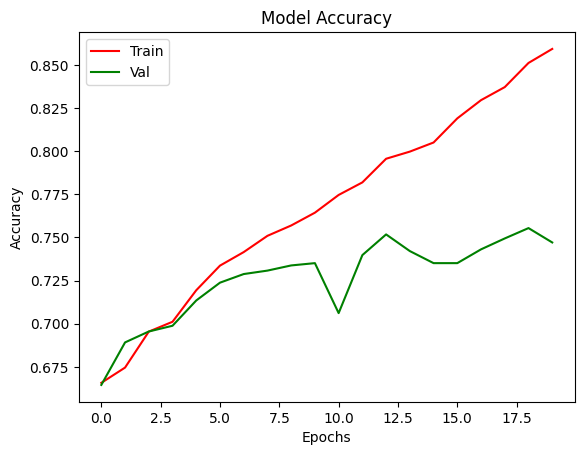

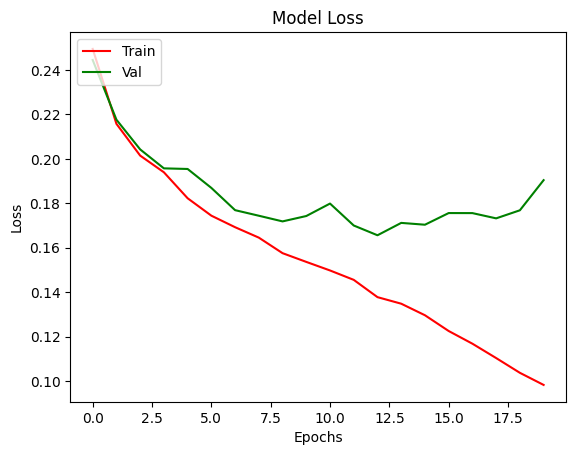

In [ ]:
plt.plot(history.history['accuracy'],color='red')
plt.plot(history.history['val_accuracy'],color='green')

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.legend(['Train', 'Val'], loc='upper left',)
plt.show()


plt.plot(history.history['loss'],color='red')
plt.plot(history.history['val_loss'],color='green')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 75, 75, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 37, 37, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 37, 37, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 18, 18, 64)        0

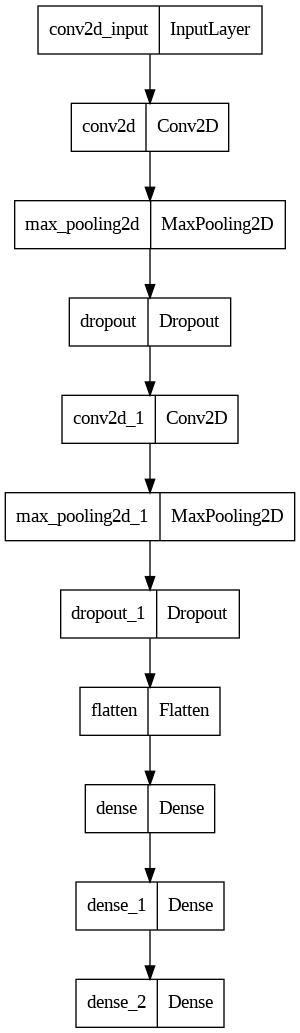

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model_cnn)

##GoogleNet

In [ ]:
import keras
from keras.applications import InceptionV3 #GoogleNet

In [ ]:
model1=InceptionV3(input_shape=(75,75,3),weights="imagenet",include_top=False)

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
def build_cnn_model(input_shape = (75, 75, 3), num_classes=2):
  model = Sequential() # layer has 1 i/p and 1 o/p
  model.add(model1)
  model.add(Flatten())
  model.add(keras.layers.Dense(128,activation="relu"))
  model.add(keras.layers.Dense(7,activation="sigmoid"))
  model.summary()
  optimizer= Adam(lr=0.001)

  model.compile(optimizer = optimizer, loss='binary_crossentropy', metrics=["accuracy"])

  return model

In [ ]:
model_cnn = build_cnn_model()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 128)               262272    
                                                                 
 dense_4 (Dense)             (None, 7)                 903       
                                                                 
Total params: 22,065,959
Trainable params: 22,031,527
Non-trainable params: 34,432
_________________________________________________________________


In [ ]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_annealer = ReduceLROnPlateau(monitor='val_acc',mode='max',
                                          patience=3,
                                          verbose=1,
                                         factor=0.5,
                                          min_lr = 1e-4)

history = model_cnn.fit(x_train,
                    y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size = 64,
                    verbose=1,
                    callbacks=[learning_rate_annealer],validation_data=(x_test,y_test))

Epoch 1/50
110/110 [==============================] - ETA: 0s - loss: 0.2247 - accuracy: 0.6922

110/110 [==============================] - 328s 3s/step - loss: 0.2247 - accuracy: 0.6922 - val_loss: 3.3555 - val_accuracy: 0.6622 - lr: 0.0010
Epoch 2/50
110/110 [==============================] - ETA: 0s - loss: 0.1788 - accuracy: 0.7365

110/110 [==============================] - 312s 3s/step - loss: 0.1788 - accuracy: 0.7365 - val_loss: 7.2769 - val_accuracy: 0.3631 - lr: 0.0010
Epoch 3/50
110/110 [==============================] - ETA: 0s - loss: 0.1682 - accuracy: 0.7559

110/110 [==============================] - 313s 3s/step - loss: 0.1682 - accuracy: 0.7559 - val_loss: 0.4502 - val_accuracy: 0.6316 - lr: 0.0010
Epoch 4/50
110/110 [==============================] - ETA: 0s - loss: 0.1442 - accuracy: 0.7877

110/110 [==============================] - 313s 3s/step - loss: 0.1442 - accuracy: 0.7877 - val_loss: 0.1781 - val_accuracy: 0.7474 - lr: 0.0010
Epoch 5/50
110/110 [==============================] - ETA: 0s - loss: 0.1393 - accuracy: 0.8086

110/110 [==============================] - 313s 3s/step - loss: 0.1393 - accuracy: 0.8086 - val_loss: 0.2509 - val_accuracy: 0.6649 - lr: 0.0010
Epoch 6/50
110/110 [==============================] - ETA: 0s - loss: 0.1664 - accuracy: 0.7572

110/110 [==============================] - 305s 3s/step - loss: 0.1664 - accuracy: 0.7572 - val_loss: 1.9172 - val_accuracy: 0.7111 - lr: 0.0010
Epoch 7/50
110/110 [==============================] - ETA: 0s - loss: 0.2115 - accuracy: 0.7385

110/110 [==============================] - 308s 3s/step - loss: 0.2115 - accuracy: 0.7385 - val_loss: 0.5265 - val_accuracy: 0.5661 - lr: 0.0010
Epoch 8/50
110/110 [==============================] - ETA: 0s - loss: 0.1625 - accuracy: 0.7575

110/110 [==============================] - 306s 3s/step - loss: 0.1625 - accuracy: 0.7575 - val_loss: 0.1985 - val_accuracy: 0.6988 - lr: 0.0010
Epoch 9/50
110/110 [==============================] - ETA: 0s - loss: 0.1513 - accuracy: 0.7796

110/110 [==============================] - 305s 3s/step - loss: 0.1513 - accuracy: 0.7796 - val_loss: 0.1744 - val_accuracy: 0.7418 - lr: 0.0010
Epoch 10/50
110/110 [==============================] - ETA: 0s - loss: 0.1441 - accuracy: 0.7900

110/110 [==============================] - 307s 3s/step - loss: 0.1441 - accuracy: 0.7900 - val_loss: 0.1799 - val_accuracy: 0.7245 - lr: 0.0010
Epoch 11/50
110/110 [==============================] - ETA: 0s - loss: 0.1397 - accuracy: 0.8004

110/110 [==============================] - 309s 3s/step - loss: 0.1397 - accuracy: 0.8004 - val_loss: 0.1670 - val_accuracy: 0.7584 - lr: 0.0010
Epoch 12/50
 68/110 [=================>............] - ETA: 1:49 - loss: 0.1290 - accuracy: 0.8132

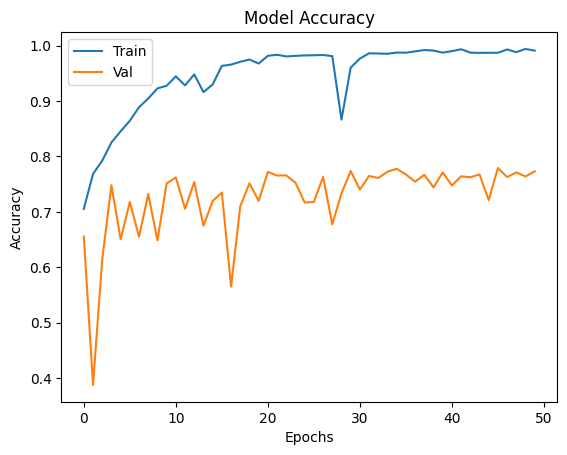

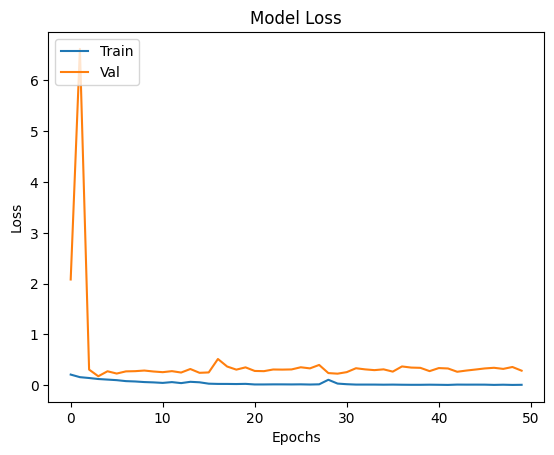

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 128)               262272    
                                                                 
 dense_4 (Dense)             (None, 7)                 903       
                                                                 
Total params: 22,065,959
Trainable params: 22,031,527
Non-trainable params: 34,432
_________________________________________________________________


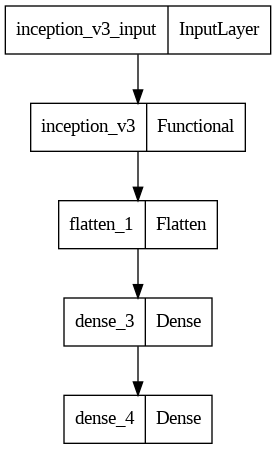

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model_cnn)

##VGG16

In [ ]:
from tensorflow.keras.applications import VGG16

In [ ]:
model3=VGG16(input_shape=(75,75,3),weights="imagenet",include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
def build_cnn_model(input_shape = (75,75, 3), num_classes=2):
    model = Sequential()
    model.add(model3)

    model.add(Flatten())

    model.add(Dense(128, activation='relu', kernel_initializer='normal'))
    model.add(Dense(128, activation='relu', kernel_initializer='normal'))

    model.add(Dense(7, activation = 'softmax'))
    model.summary()
    optimizer= Adam(lr=0.001)

    model.compile(optimizer = optimizer, loss='binary_crossentropy', metrics=["accuracy"])

    return model

In [ ]:
model_cnn = build_cnn_model()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_5 (Dense)             (None, 128)               262272    
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 7)                 903       
                                                                 
Total params: 14,994,375
Trainable params: 14,994,375
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_annealer = ReduceLROnPlateau(monitor='val_acc',mode='max',
                                          patience=3,
                                          verbose=1,
                                         factor=0.5,
                                          min_lr = 1e-4)

history = model_cnn.fit(x_train,
                    y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size = 64,
                    verbose=1,
                    callbacks=[learning_rate_annealer],validation_data=(x_test,y_test))

Epoch 1/50
110/110 [==============================] - ETA: 0s - loss: 0.3079 - accuracy: 0.6552 

110/110 [==============================] - 1920s 17s/step - loss: 0.3079 - accuracy: 0.6552 - val_loss: 0.2340 - val_accuracy: 0.6646 - lr: 0.0010
Epoch 2/50
108/110 [============================>.] - ETA: 31s - loss: 0.2335 - accuracy: 0.6703